### 1. Скачайте датасет fifаs2.сsv. Проанализируйте его и определите, какие данные являются неполными. Удалите ненужные колонки и недостающие значения.

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [80]:
df = pd.read_csv("fifa_s2.csv", sep=',')

Проанализируем DataFrame. 

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2399 non-null   int64  
 1   Name                      2399 non-null   object 
 2   Age                       2399 non-null   int64  
 3   Nationality               2392 non-null   object 
 4   Overall                   2399 non-null   int64  
 5   Potential                 2399 non-null   int64  
 6   Club                      2158 non-null   object 
 7   Value                     2142 non-null   float64
 8   Wage                      2399 non-null   int64  
 9   Preferred Foot            2399 non-null   object 
 10  International Reputation  2389 non-null   float64
 11  Skill Moves               2393 non-null   float64
 12  Position                  2378 non-null   object 
 13  Joined                    2399 non-null   int64  
 14  Contract

2399 - строк и 18 - столбцов, распределение по типу данных float64(6), int64(6), object(6). Присутствуют пропуски данных в столбцах: Nationality,  Club, Value, International Reputation, Skill Moves, Position, Contract Valid Until, Release Clause               

Проанализируем описательную статистику

In [82]:
df.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,2399.000000,2399.000000,2399.000000,2399.000000,2142.000000,2399.000000,2389.000000,2393.000000,2399.000000,2399.000000,2399.000000,2396.000000
mean,212033.680700,25.213005,69.115048,74.115048,5980.873016,24.178825,1.308497,2.469703,2016.145894,5.955300,166.802782,10690.033498
std,30549.399068,4.633622,8.060195,7.190957,11963.420681,49.552098,0.687175,0.844531,2.085829,0.219249,15.241015,21780.029323
min,1179.000000,16.000000,47.000000,48.000000,20.000000,0.000000,1.000000,1.000000,2000.000000,5.250000,121.000000,35.000000
25%,195105.000000,22.000000,64.000000,69.000000,500.000000,1.000000,1.000000,2.000000,2016.000000,5.833333,154.000000,1100.000000
50%,218745.000000,25.000000,69.000000,74.000000,1100.000000,5.000000,1.000000,2.000000,2017.000000,6.000000,165.000000,3800.000000
75%,234576.000000,29.000000,74.000000,79.000000,6000.000000,22.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,7500.000000
max,246608.000000,44.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,2018.000000,6.583333,214.000000,228100.000000


In [83]:
df.describe(include='object')

,Name,Nationality,Club,Preferred Foot,Position,Contract Valid Until
count,2399,2392,2158,2399,2378,2126
unique,2371,102,81,2,27,16
top,J. Rodríguez,Spain,Manchester City,Right,GK,01/01/2019
freq,3,300,33,1843,275,555


Выведем на отображение DataFrame

In [84]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,1179,G. Buffon,40,Italy,88,88,Paris Saint-Germain,4000.0,77,Right,4.0,1.0,GK,2018,01/01/2019,6.333333,203.0,7400.0
1,5479,Casillas,37,Spain,82,82,FC Porto,1500.0,10,Left,4.0,1.0,NaN,2015,01/01/2019,6.083333,185.0,3000.0
2,8205,Braga,35,Portugal,70,70,CD Aves,750.0,5,Right,1.0,3.0,LCM,2017,01/01/2019,5.916667,165.0,1600.0
3,9014,A. Robben,34,Netherlands,84,84,FC Bayern München,15500.0,110,Left,4.0,4.0,RM,2009,01/01/2019,5.916667,176.0,25600.0
4,19521,J. Ibehre,35,England,61,61,Cambridge United,120.0,2,Right,1.0,2.0,ST,2017,01/01/2019,6.333333,203.0,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,246465,Guerrero,16,Spain,63,76,CF Rayo Majadahonda,625.0,1,Left,1.0,3.0,CM,2018,01/01/2019,5.916667,165.0,1400.0
2395,246594,H. Massengo,16,France,62,75,AS Monaco,450.0,2,Right,1.0,2.0,CDM,2018,01/01/2021,5.833333,146.0,1100.0
2396,246599,Guillem Jaime,19,Spain,64,80,FC Barcelona,975.0,13,Right,1.0,3.0,RW,2018,01/01/2020,5.833333,154.0,2600.0
2397,246606,Fran García,18,Spain,64,79,Real Madrid,825.0,9,Left,1.0,2.0,LB,2018,01/01/2019,5.583333,139.0,2200.0


<AxesSubplot:>

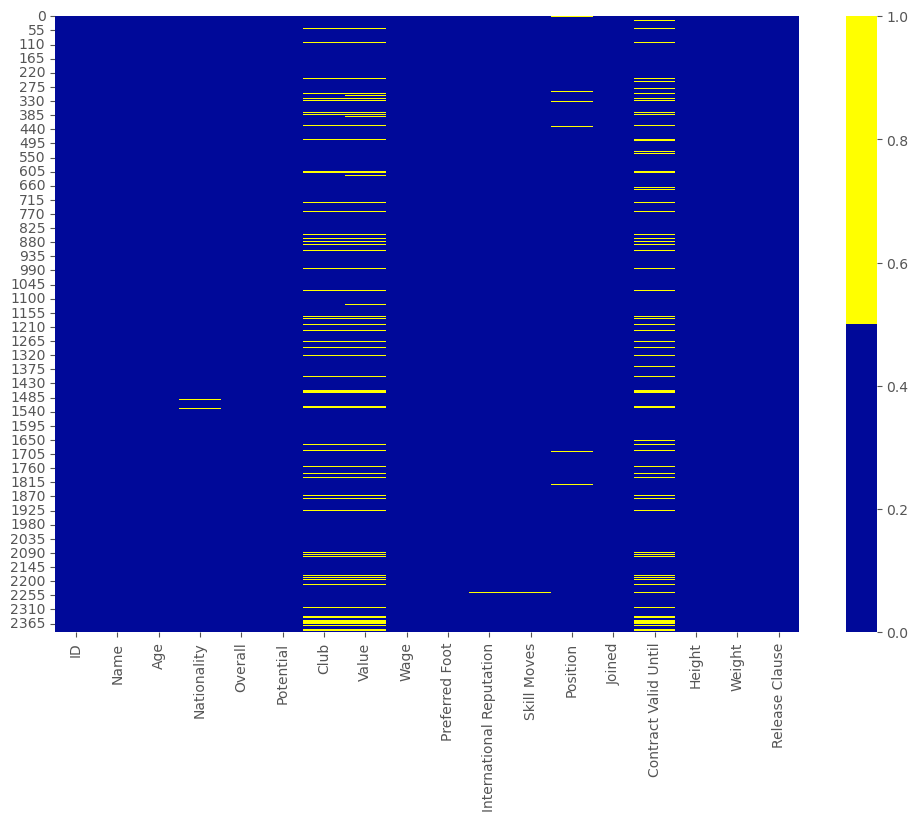

In [85]:
#постороим тепловую карту, чтобы проанализировать пропуске в заполнении данных

cols = df.columns[:30]
colours = ['#000999','#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [86]:
#пропуски в заполнениях
for col in df.columns:
    missing_values = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing_values*100)))

ID - 0%
Name - 0%
Age - 0%
Nationality - 0%
Overall - 0%
Potential - 0%
Club - 10%
Value - 11%
Wage - 0%
Preferred Foot - 0%
International Reputation - 0%
Skill Moves - 0%
Position - 1%
Joined - 0%
Contract Valid Until - 11%
Height - 0%
Weight - 0%
Release Clause - 0%


Удалим строки с недостающими значениями Nationality, International Reputation, Skill Moves, Position, Release Clause, где пропуск данных составил менее 1%.

In [87]:
df_cleaned = df.dropna(subset=['Nationality', 'International Reputation', 'Skill Moves', 'Position', 'Release Clause'])


In [88]:
df_cleaned.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       257
Wage                          0
Preferred Foot                0
International Reputation      0
Skill Moves                   0
Position                      0
Joined                        0
Contract Valid Until        267
Height                        0
Weight                        0
Release Clause                0
dtype: int64

Остальные пропуски данных связаны с трудовыми отношенями футболистов Club, Value, Contract Valid Until.
Первоочередно удалим строки с пропусками данных в Contract Valid Until и проанализируем как это отразится на значениях Club, Value.

In [89]:
df_cleaned = df_cleaned.dropna(subset=['Contract Valid Until'])
df_cleaned.isnull().sum()

ID                           0
Name                         0
Age                          0
Nationality                  0
Overall                      0
Potential                    0
Club                         0
Value                       16
Wage                         0
Preferred Foot               0
International Reputation     0
Skill Moves                  0
Position                     0
Joined                       0
Contract Valid Until         0
Height                       0
Weight                       0
Release Clause               0
dtype: int64

как видим удаление Contract Valid Until повлекло за собой удаление пустых строк в Club, Value. Удалим оставшиеся 16 пустых записей с Value. 

In [90]:
df_cleaned = df_cleaned.dropna(subset=['Value'])
df_cleaned.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

Удалить ненужные колонки не представляется возможным т.к. нет постановки задачи для каких целей будут использоваться данные из DataFrame.

### 2. Найдите в датафрейме полные дубликаты и удалите их. Значения могут быть одинаковыми, но написаны по-разному. Например, может отличаться размер регистра (заглавные и строчные буквы). Особое внимание уделить колонке с названиями команд.

In [91]:
df_cleaned.shape

(2075, 18)

In [92]:
df_cleaned.Club.value_counts()

Real Madrid           33
Burnley               33
Cardiff City          33
Borussia Dortmund     32
1. FSV Mainz 05       32
                      ..
Fc Barcelona           2
FC Heidenheim 1846     1
Aalborg BK             1
Livingston FC          1
FC Köln                1
Name: Club, Length: 81, dtype: int64

Приведение DataFrame к одному нижнему регистру

In [93]:
df_cleaned = df_cleaned.applymap(lambda x: x.lower() if type(x) == str else x)

Поиск дубликатов

In [94]:
duplicates = df_cleaned[df_cleaned.duplicated()]
duplicates

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
154,168651,i. rakitić,30,croatia,87,87,fc barcelona,46500.0,260,right,4.0,3.0,rcm,2014,01/01/2021,6.000000,172.0,95300.0
304,181872,a. vidal,31,chile,85,85,fc barcelona,26000.0,205,right,4.0,3.0,cam,2018,01/01/2021,5.916667,165.0,53300.0


Удаление дубликатов

In [95]:
no_duplicates = df_cleaned.drop_duplicates()

In [96]:
no_duplicates.shape

(2073, 18)

In [100]:
no_duplicates.Club.value_counts()

real madrid           33
burnley               33
cardiff city          33
borussia dortmund     32
1. fsv mainz 05       32
                      ..
roma                  19
aalborg bk             1
fc heidenheim 1846     1
livingston fc          1
fc köln                1
Name: Club, Length: 80, dtype: int64

### 3. Напишите функцию, которая добавит колонку с разбиением возраста по группам: до 20, от 20 до 30, от 30 до 36 и старше 36. Посчитайте количество футболистов в каждой категории.

In [113]:
no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2398
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2073 non-null   int64  
 1   Name                      2073 non-null   object 
 2   Age                       2073 non-null   int64  
 3   Nationality               2073 non-null   object 
 4   Overall                   2073 non-null   int64  
 5   Potential                 2073 non-null   int64  
 6   Club                      2073 non-null   object 
 7   Value                     2073 non-null   float64
 8   Wage                      2073 non-null   int64  
 9   Preferred Foot            2073 non-null   object 
 10  International Reputation  2073 non-null   float64
 11  Skill Moves               2073 non-null   float64
 12  Position                  2073 non-null   object 
 13  Joined                    2073 non-null   int64  
 14  Contract

In [132]:
def gr_age(x):
    if x < 20:
        return 'up to 20'
    elif x >= 20 and x <30:
        return 'from 20 to 30'
    elif x >= 30 and x <36:
        return 'from 30 to 36'
    elif x > 36:
        return 'older than 36'
    else:
        return 'other'

In [136]:
no_duplicates['Group_age'] = no_duplicates['Age'].apply(gr_age)

In [140]:
no_duplicates.head(50)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Group_age
0,1179,g. buffon,40,italy,88,88,paris saint-germain,4000.0,77,right,4.0,1.0,gk,2018,01/01/2019,6.333333,203.0,7400.0,older than 36
2,8205,braga,35,portugal,70,70,cd aves,750.0,5,right,1.0,3.0,lcm,2017,01/01/2019,5.916667,165.0,1600.0,from 30 to 36
3,9014,a. robben,34,netherlands,84,84,fc bayern münchen,15500.0,110,left,4.0,4.0,rm,2009,01/01/2019,5.916667,176.0,25600.0,from 30 to 36
4,19521,j. ibehre,35,england,61,61,cambridge united,120.0,2,right,1.0,2.0,st,2017,01/01/2019,6.333333,203.0,210.0,from 30 to 36
5,20209,ricardo costa,37,portugal,74,74,cd tondela,750.0,4,right,2.0,2.0,lcb,2017,01/01/2019,6.000000,181.0,1600.0,older than 36
6,20801,cristiano ronaldo,33,portugal,94,94,juventus,77000.0,405,right,5.0,5.0,st,2018,01/01/2022,6.166667,183.0,127100.0,from 30 to 36
8,27532,d. de vries,37,netherlands,66,66,celtic,40.0,7,right,1.0,1.0,gk,2016,01/01/2019,6.250000,212.0,72.0,older than 36
9,45083,s. von bergen,35,switzerland,73,73,bsc young boys,950.0,12,right,2.0,2.0,lcb,2013,01/01/2022,6.000000,174.0,1400.0,from 30 to 36
10,46175,m. rosenberg,35,sweden,73,73,malmö ff,1800.0,6,right,1.0,3.0,rs,2014,01/01/2020,6.000000,179.0,2400.0,from 30 to 36
11,47201,s. proto,35,belgium,76,76,lazio,1800.0,20,right,2.0,1.0,gk,2018,01/01/2021,6.000000,163.0,3100.0,from 30 to 36


Стоит учесть, чтов постановке задачи возраст 36 не был включен ни в одну из групп.

In [139]:
no_duplicates.Group_age.value_counts()

from 20 to 30    1415
from 30 to 36     379
up to 20          262
older than 36      10
other               7
Name: Group_age, dtype: int64